In [0]:
#Authenticate
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# ! pip install quandl
import quandl
import pandas as pd

quandl.ApiConfig.api_key = 'apikeyhere'

# tesla dataset
# tesla = quandl.get('WIKI/TSLA')

# gm dataset
# gm = quandl.get('WIKI/GM')

<b> List of Time series data sets from uci </b>
https://archive.ics.uci.edu/ml/datasets.html?format=&task=&att=&area=&numAtt=&numIns=&type=ts&sort=nameUp&view=table

<b>for dataset from analytics vidhya: </b>
https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

<b> Check this out too </b>
https://opendata.stackexchange.com/questions/10313/seasonal-sales-data-for-time-series-analysis


In [0]:
dataset_downloaded = drive.CreateFile({'id':'1WhNvTW5bQGWHoD4LnCs6UwhobUX5LS3s'})
dataset_downloaded.GetContentFile('Daily_Demand_Forecasting_Orders.csv')

In [0]:
# columns= ['Week_of_the_month ','Day_of_the_week_(Monday_to_Friday)','Non_urgent_order integer','Urgent_order integer',
#          'Order_type_A integer','Order_type_B integer','Order_type_C integer','Fiscal_sector_orders intege',
#          'Orders_from_the_traffic_controller_sector integer','Banking_orders_(1) integer','Banking_orders_(2) integer'
#          'Banking_orders_(3) integer','Target_(Total_orders) integer']
df_demand = pd.read_csv('Daily_Demand_Forecasting_Orders.csv',sep=';')

In [7]:
df_demand.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [8]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
Week of the month (first week, second, third, fourth or fifth week    60 non-null int64
Day of the week (Monday to Friday)                                    60 non-null int64
Non-urgent order                                                      60 non-null float64
Urgent order                                                          60 non-null float64
Order type A                                                          60 non-null float64
Order type B                                                          60 non-null float64
Order type C                                                          60 non-null float64
Fiscal sector orders                                                  60 non-null float64
Orders from the traffic controller sector                             60 non-null int64
Banking orders (1)                                                    60 non-null int64
Banki

In [0]:
dataset_downloaded = drive.CreateFile({'id':'1Vg1ivPswYp5ksEvLra5XhOnP1npIrRx5'})
dataset_downloaded.GetContentFile('train.csv')
df_train = pd.read_csv('train.csv')
dataset_downloaded = drive.CreateFile({'id':'1DeKLjHV0G6EcedHcKuUBX1gPRKycMWEz'})
dataset_downloaded.GetContentFile('test.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_test.drop('ID',axis=1,inplace=True)
df_train.drop('ID',axis=1,inplace=True)

In [321]:
df_train.isnull().sum()

Datetime    0
Count       0
dtype: int64

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df_training = df_train[:15000]
df_holdout = df_train[15000:]

In [330]:
df_holdout.shape,df_training.shape

((0, 1), (762, 1))

In [0]:
#We will convert datetime into a datetime object and then index it 
#Then we will split train data into train and holdout to test our forecast and based on the best model, we will 
#use that model to forecast on our test data.

df_train['Datetime'] = pd.to_datetime(df_train['Datetime'],infer_datetime_format=True)
df_train.index = df_train['Datetime']
df_train = df_train.resample('D').mean()
df_training.Datetime = pd.to_datetime(df_training.Datetime,infer_datetime_format=True) 
df_training.index = df_training.Datetime 
df_training = df_training.resample('D').mean() 
df_holdout.Datetime = pd.to_datetime(df_holdout.Datetime,infer_datetime_format=True) 
df_holdout.index = df_holdout.Datetime 
df_holdout = df_holdout.resample('D').mean()

In [325]:
#@Issue is since the index is datetime type we can't divide this like this , so we need to do this before making
#index to be datetime
df_training.tail()

,Count
Datetime,
2014-05-07,245.666667
2014-05-08,266.166667
2014-05-09,289.333333
2014-05-10,165.250000
2014-05-11,131.416667


In [161]:
df_holdout.tail()

,Count
Datetime,
2014-12-05,284.416667
2014-12-06,314.166667
2014-12-07,244.083333
2014-12-08,615.083333
2014-12-09,375.416667


In [266]:
df_training.tail()

,Count
Datetime,
2014-05-07,245.666667
2014-05-08,266.166667
2014-05-09,289.333333
2014-05-10,165.250000
2014-05-11,131.416667


In [267]:
df_holdout.head()

,Count
Datetime,
2014-05-12,284.416667
2014-05-13,278.583333
2014-05-14,266.250000
2014-05-15,253.666667
2014-05-16,282.000000


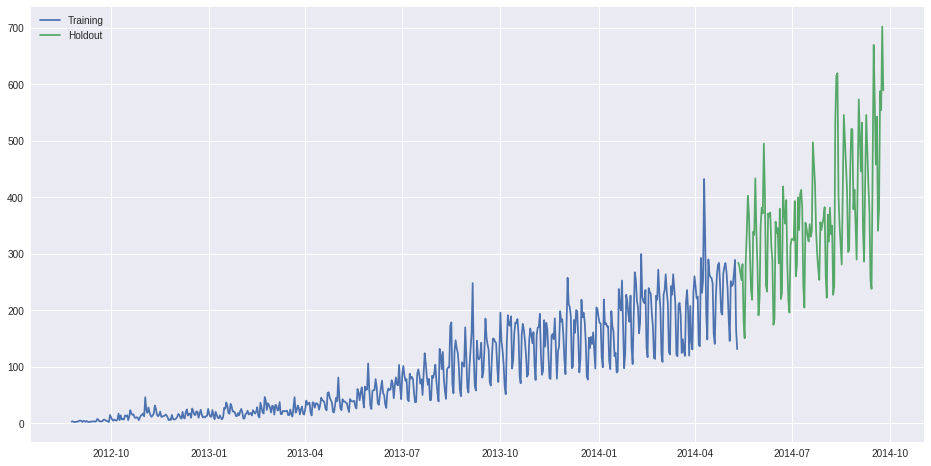

In [268]:
plt.figure(figsize=(16,8))
plt.plot(df_training['Count'],label='Training')
plt.plot(df_holdout['Count'],label = "Holdout")
plt.legend()


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose


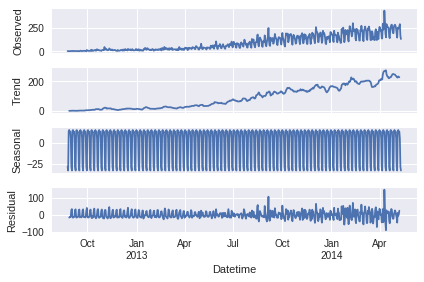

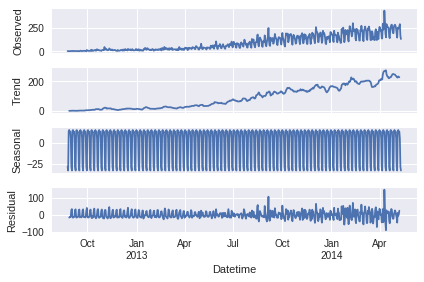

In [269]:
result= seasonal_decompose(df_training['Count'])
result.plot()

**Methods to be followed for Comparison:'
1.Simple Moving Average(SMA)
2.Exponential Weighted MA(more weight to recent data)
3.Holt Linear
4,Holt Winter 
5.ARIMA
6.Seasonal ARIMA**


In [0]:
# For SMA , we will use a rolling window of 30 days
df_training['SMA-30'] = df_training['Count'].rolling(30).mean()
df_forecast = df_holdout.copy()
df_forecast['SMA-Forecast'] = df_training['SMA-30'].iloc[-1] 

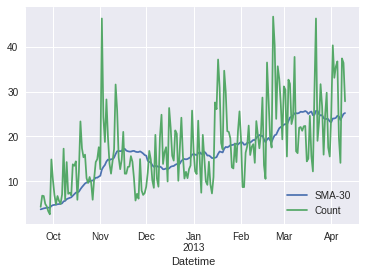

In [272]:
plt.figure(figsize=(16,8))
df_training[['SMA-30','Count']].dropna().head(200).plot()


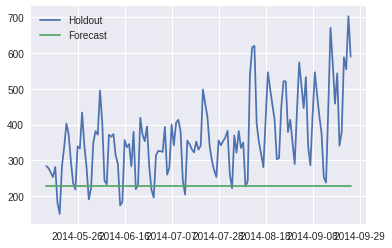

In [273]:
plt.plot(df_holdout['Count'],label='Holdout')
plt.plot(df_forecast['SMA-Forecast'],label='Forecast')
plt.legend()

In [316]:
df_holdout.isnull().sum()

Count    0
dtype: int64

In [0]:
df_holdout = df_holdout.dropna();

In [315]:
df_forecast.isnull().sum()

Count    0
dtype: int64

In [318]:
df_holdout.shape

(137, 1)

In [317]:
df_forecast.dropna(inplace=True)
df_holdout.dropna(inplace=True)
df_holdout.shape, df_forecast.shape

((137, 1), (137, 1))

In [186]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(df_holdout['Count'], df_forecast['SMA-Forecast' ]))
print('The rmse error of SMA is {}'.format(rmse))

The rmse error of SMA is 171.27723108007024


In [0]:
#Exponential Weighted MA:
df_holdout.drop(['SMA-12', 'EWMA-12', 'SMA-7', 'EWMA-7'],axis=1,inplace=True)

In [147]:
rmse = math.sqrt(mean_squared_error(df_holdout['Count'], df_forecast['EWMA-Forecast' ]))
print('The rmse error of SMA is {}'.format(rmse))

The rmse error of SMA is 186.97211438611663


In [0]:
#Simple Smoothing, Holt, Holt Winter
import statsmodels.api as sm

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary") # here, why reject the null hypotheses, if it is below 0.05 then, I've studied that null hypothesis is not false.
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [190]:
adf_check(df_training['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.08953307894494586
p-value : 0.9653391602173738
#Lags Used : 14
Number of Observations Used : 610
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [0]:
df_training['First Diff'] = df_training['Count'] - df_training['Count'].shift(1)

In [192]:
adf_check(df_training['First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.024100945747975
p-value : 5.671299243991642e-15
#Lags Used : 19
Number of Observations Used : 604
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


As we see the p-value is very very small after taking first difference thus our data is stationary which mean that it's mean and variance should be constant over time. We will plot the first difference to visualize this.

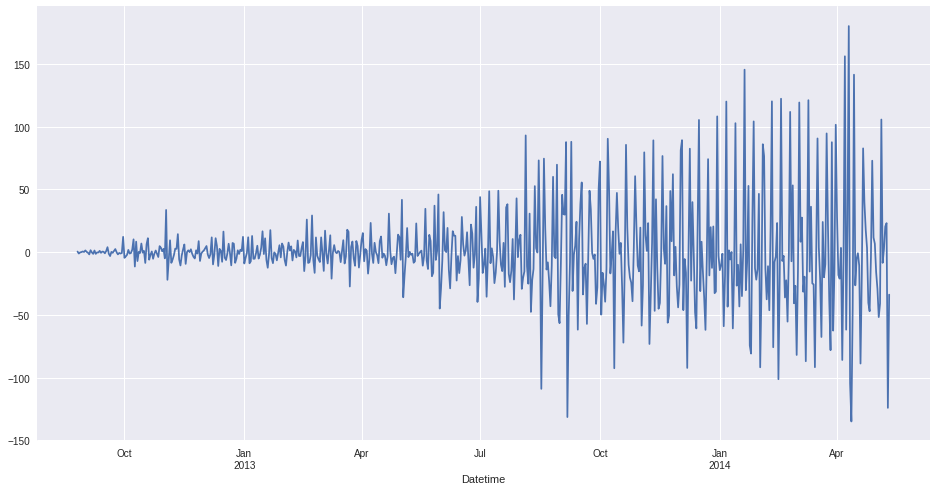

In [193]:
df_training['First Diff'].plot(figsize=(16,8))

We see that the first difference is centered around 0 mean.

In [194]:
df_training['Second Diff'] = df_training['First Diff'] - df_training['First Diff'].shift(1)
adf_check(df_training['Second Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.429344730066141
p-value : 6.5749927628425565e-21
#Lags Used : 19
Number of Observations Used : 603
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


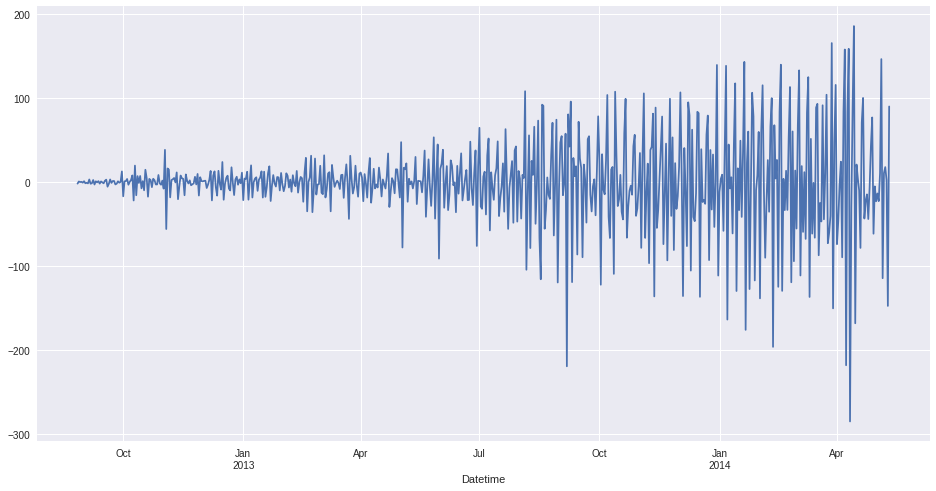

In [307]:
df_training['Second Diff'].plot(figsize=(16,8))

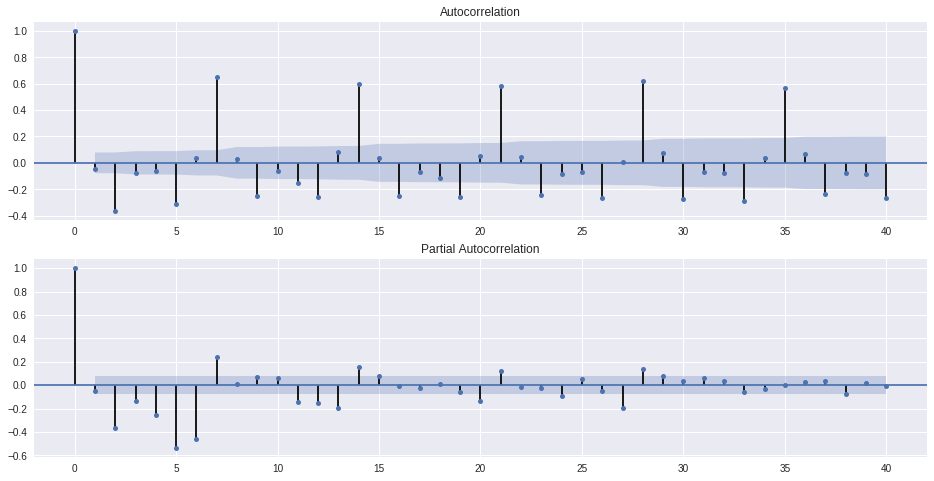

In [308]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_training['First Diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_training['First Diff'].dropna(),lags=40,ax=ax2)

We use ACF(Auto-Correlation) to get the order of moving Average in ARIMA(p,d,q), We see at the 0th index the correlation is 1 because the correlation with itself will always be 1. So order is taken as the lag at which the autocorrelation is significant.
p = Lag order for AR(Calculated from PACF)
d = Differencing for making series stationary
q = Lag order for MA (calculated from ACF)
Also PACF correlation values gradually becomes 0

In ACF, we see that after 7 lag we have strong correlation which is due to seasonilty of 7 days where pattern repeat itself.Same is the case with14,21,28 lags and so on.

In [0]:
#Since we have seasonal Data, We Will use SARIMAX which is seasonal ARIMA
df_forecast = df_holdout.copy()

In [310]:
fit1 = sm.tsa.statespace.SARIMAX(df_training['Count'],order=(2,1,2),seasonal_order=(1,1,1,7)).fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


In [311]:
df_training.index[-1]

Timestamp('2014-05-11 00:00:00', freq='D')

In [192]:
type(df_holdout.index[0])

pandas._libs.tslib.Timestamp

In [284]:
start=pd.to_datetime("2014-05-12")
type(start)

pandas._libs.tslib.Timestamp

In [212]:
df_training.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [0]:
df_forecast['SARIMA'] = fit1.predict(start="2014-05-12",end="2014-09-25",dynamic=True)

In [195]:
df_forecast.index[0]

Timestamp('2014-05-25 00:00:00')